In [7]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv('data/mouse_drug_data.csv')
clinic_drug_data = pd.read_csv('data/clinicaltrial_data.csv')

# Combine the data into a single dataset
lab_mice_df = pd.merge(mouse_drug_data, clinic_drug_data, how='left', on='Mouse ID')
lab_mice_df = pd.DataFrame(lab_mice_df, columns = ['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug'] )
lab_mice_df = lab_mice_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume"})

# Display the data table for preview
lab_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_df = lab_mice_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume"]

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor_df)

# Preview DataFrame
mean_tumor_df.head()

Tumor Volume
Drug      Timepoint              
Capomulin 0             45.000000
          5             44.266086
          10            43.084291
          15            42.064317
          20            40.716325

In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_df = lab_mice_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume"]

# Convert to DataFrame
sem_tumor_df = pd.DataFrame(sem_tumor_df)

# Preview DataFrame
sem_tumor_df.head()

Tumor Volume
Drug      Timepoint              
Capomulin 0              0.000000
          5              0.448593
          10             0.702684
          15             0.838617
          20             0.909731

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_reindex = mean_tumor_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume"]

sem_tumor_df = sem_tumor_df.reset_index()
sem_tumor_reindex = sem_tumor_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume"]
# Preview that Reformatting worked
mean_tumor_reindex.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


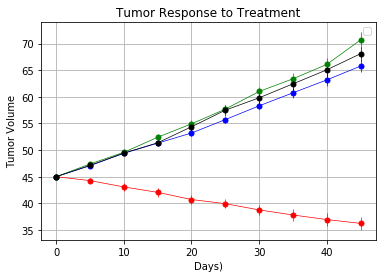

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_reindex.index, mean_tumor_reindex["Capomulin"], 
             yerr=sem_tumor_reindex["Capomulin"], color="r", marker="o", markersize=5, linestyle="solid", linewidth=0.70)
plt.errorbar(mean_tumor_reindex.index, mean_tumor_reindex["Infubinol"], 
             yerr=sem_tumor_reindex["Infubinol"], color="b", marker="o", markersize=5, linestyle="solid", linewidth=0.70)
plt.errorbar(mean_tumor_reindex.index, mean_tumor_reindex["Ketapril"], 
             yerr=sem_tumor_reindex["Ketapril"], color="g", marker="o", markersize=5, linestyle="solid", linewidth=0.70)
plt.errorbar(mean_tumor_reindex.index, mean_tumor_reindex["Placebo"], 
             yerr=sem_tumor_reindex["Placebo"], color="k", marker="o", markersize=5, linestyle="solid", linewidth=0.70)
# Applying Labels
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume")
plt.xlabel("Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="medium")


# Show the Figure
plt.show()
# Save the Figure
plt.savefig("TumorResponseToTreatment.png")


## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mstatic_mean = lab_mice_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mstatic_mean = pd.DataFrame(mstatic_mean)


# Preview DataFrame
mstatic_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [26]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mstatic_sem = lab_mice_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
mstatic_sem = pd.DataFrame(mstatic_sem)

# Preview DataFrame
mstatic_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [29]:
# Minor Data Munging to Re-Format the Data Frames
#mstatic_mean = mstatic_mean.reset_index()
#mstatic_mean_reindex = mstatic_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

#mstatic_sem = mstatic_sem.reset_index()
mstatic_sem_reindex = mstatic_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked

mstatic_sem_reindex.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


No handles with labels found to put in legend.


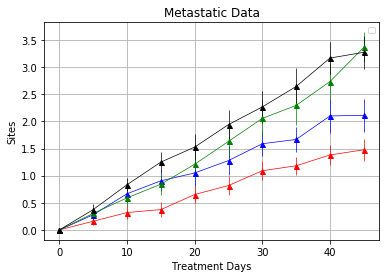

<Figure size 432x288 with 0 Axes>

In [32]:
# Generate the Plot (with Error Bars)
plt.errorbar(mstatic_mean_reindex.index, mstatic_mean_reindex["Capomulin"], 
                 yerr=mstatic_sem_reindex["Capomulin"], color="r", marker="^", markersize=5, linestyle="solid", linewidth=0.70)
plt.errorbar(mstatic_mean_reindex.index, mstatic_mean_reindex["Infubinol"],
                 yerr=mstatic_sem_reindex["Infubinol"], color="b", marker="^", markersize=5, linestyle="solid", linewidth=0.70)
plt.errorbar(mstatic_mean_reindex.index, mstatic_mean_reindex["Ketapril"], 
                 yerr=mstatic_sem_reindex["Ketapril"], color="g", marker="^", markersize=5, linestyle="solid", linewidth=0.70)
plt.errorbar(mstatic_mean_reindex.index, mstatic_mean_reindex["Placebo"], 
                 yerr=mstatic_sem_reindex["Placebo"], color="k", marker="^", markersize=5, linestyle="solid", linewidth=0.70)

plt.title("Metastatic Data")
plt.ylabel("Sites")
plt.xlabel("Treatment Days")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Show the Figure
plt.show()
# Save the Figure
plt.savefig("MetastaticData.png")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)

# Save the Figure

# Show the Figure


## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
surv_rate_mice = lab_mice_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume"]

# Convert to DataFrame
surv_rate_mice = pd.DataFrame({"Mouse Count": surv_rate_mice})

# Preview DataFrame
surv_rate_mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [20]:
# Minor Data Munging to Re-Format the Data Frames
surv_rate_mice = surv_rate_mice.reset_index()
surv_rate_mice_reindex = surv_rate_mice.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
surv_rate_mice_reindex.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


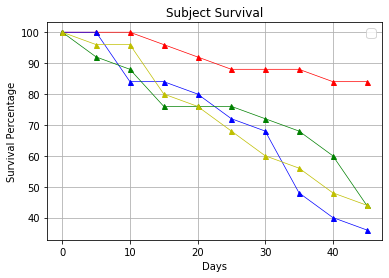

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * surv_rate_mice_reindex["Capomulin"] / 25, color="r", marker="^", linestyle="solid", markersize=5, linewidth=0.70)
plt.plot(100 * surv_rate_mice_reindex["Infubinol"] / 25, color="b", marker="^", linestyle="solid", markersize=5, linewidth=0.70)
plt.plot(100 * surv_rate_mice_reindex["Ketapril"] / 25, color="g", marker="^", linestyle="solid", markersize=5, linewidth=0.70)
plt.plot(100 * surv_rate_mice_reindex["Placebo"] / 25 , color="y", marker="^", linestyle="solid", markersize=5, linewidth=0.70)
plt.title("Subject Survival")
plt.ylabel("Survival Percentage")
plt.xlabel("Days")
plt.grid(True)
plt.legend(loc="left", fontsize="large", fancybox=True)

# Show the Figure
plt.show()

# Save the Figure
plt.savefig("SurvivalMice.png")

## Summary Bar Graph

In [43]:
# Calculate the percent changes for each drug
#tumor_pct_change =  (mstatic_mean_reindex.iloc[-1] - mstatic_mean_reindex.iloc[0]) /  mstatic_mean_reindex.iloc[0]
#tumor_pct_change_sem =  (mstatic_sem_reindex.iloc[-1] mstatic_sem_reindex.iloc[0]) / mstatic_sem_reindex.iloc[0]

tumor_change = (mean_tumor_reindex.loc[45, :] - mean_tumor_reindex.loc[0, :])/mean_tumor_reindex.loc[0, :] * 100
# Display the data to confirm
tumor_change



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

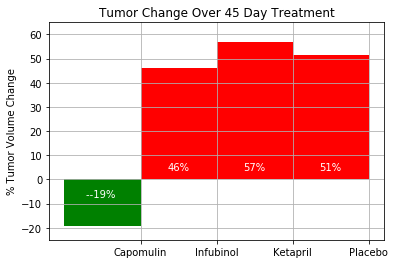

In [50]:

# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_change["Capomulin"], 
               tumor_change["Infubinol"], 
               tumor_change["Ketapril"], 
               tumor_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-25,65])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("SummaryBarGraph.png")

# Show the Figure
fig.show()